## Import Libraries

In [1]:
import pandas as pd
import json
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt

## Load Data

In [6]:
firebase_data = 'data.json'
with open(firebase_data, 'r') as infile:
    data = json.load(infile)
query_ids = list(data.keys())

In [7]:
def create_labels(nr_assessors):
    labels = ["query_id","passageid","msmarco"]
    for i in range(nr_assessors):
        labels = labels + ['user%s_id'%(i+1),'user%s_label'%(i+1)]
    return labels

In [12]:
dataframe_data = {}
label_data = {}
assessor_data = {}
for query_id in query_ids:
    query_data_lists = []
    query_data = data[query_id]
    nr_assessors = 0
    for i, passage_id in enumerate(query_data.keys()):
        dataFrameRow2be = [query_id, passage_id] + query_data[passage_id]
        query_data_lists.append(dataFrameRow2be)
        if i == 0:
            nr_assessors = int((len(query_data[passage_id])-1)/2)
    dataframe_data[query_id] = query_data_lists
    label_data[query_id] = create_labels(nr_assessors)
    assessor_data[query_id] = nr_assessors

In [10]:
dataframes = {}
for query_id in query_ids:
    df = pd.DataFrame(dataframe_data[query_id],columns=label_data[query_id])
    dataframes[query_id] = df

In [4]:
graded_dataset_df = pd.read_csv('thesis_dataset_graded_relevance.tsv',delimiter='\t',encoding='utf-8',header=None)
graded_dataset_df.columns = ["query_id", "passage_id", "grade"]

## Gather Experiment Queries

In [13]:
assessors_do_not_agree = ["838453", "866251", "321951", "427323", "993987", "540906"]
msmarco_only_relevant = ["335710", "489257"]
at_least_3 = []
for query_id in query_ids:
    nr_assessors = assessor_data[query_id]
    if nr_assessors >= 3:
        at_least_3.append(query_id)
experiment_query_ids = [int(query_id) for query_id in at_least_3 if (not (query_id in assessors_do_not_agree)) and (not (query_id in msmarco_only_relevant))]

## Gather Grades Per Query

In [20]:
grades_dict = {}
for query_id in experiment_query_ids:
    graded_subset_df = graded_dataset_df[graded_dataset_df['query_id'] == query_id]
    grades_dict[query_id] = graded_subset_df['grade'].values.tolist()

## Make shared boxplot

In [21]:
data = []
labels = []
for query_id, grades in grades_dict.items():
    labels.append(query_id)
    data.append(grades)

In [51]:
len(list(range(4,len(labels)*4,4)))

42

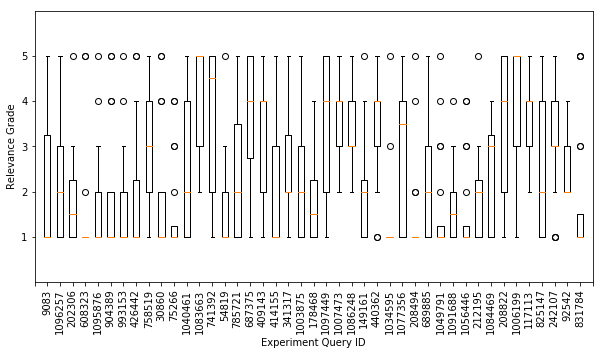

In [60]:
plt.figure(figsize=(10,5))

plt.boxplot(data,positions=list(range(4,len(labels)*4+4,4)),widths=2)
plt.xlabel("Experiment Query ID")
plt.ylabel("Relevance Grade")
plt.xticks(range(0,len(labels)*4+8,4),[""] + labels + [""],rotation=90)

plt.ylim([0,6])
plt.yticks([1,2,3,4,5])

plt.savefig('images/experiment_queries_grade_boxplots.png', bbox_inches='tight')
plt.show()

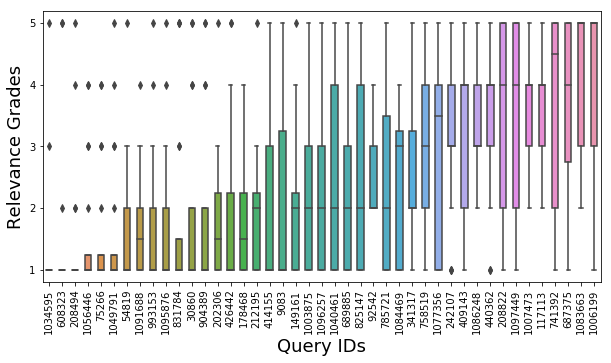

In [83]:
import pandas as pd
import seaborn as sns

df = pd.DataFrame(grades_dict)
sorted_index = df.mean().sort_values().index
df_sorted = df[sorted_index]

plt.figure(figsize=(10,5))
sns.boxplot(data=df_sorted,width=0.5)
plt.xlabel("Query IDs", size=18)
plt.ylabel("Relevance Grades", size=18)
plt.yticks([1,2,3,4,5])
plt.xticks(rotation=90)
plt.savefig('images/experiment_queries_grade_boxplots.png', bbox_inches='tight')